In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))
from css_steane.steane_code import SteaneCode
import numpy as np

In [2]:
code = SteaneCode()
print("Steane [[7,1,3]] CSS 模型加载成功！")


Steane [[7,1,3]] CSS 模型加载成功！


In [3]:
m = 1                   # 逻辑比特
Xerr = [0,0,1,0,0,0,0]  # 在第 3 位（index=2）加入 X 错误
Zerr = [0,0,0,0,0,0,0]  # 无 Z 错误

code.demo_once(m, Xerr, Zerr)


逻辑比特: 1
编码码字: [1, 1, 1, 1, 1, 1, 1]
施加 X 错误: [0, 0, 1, 0, 0, 0, 0]
施加 Z 错误: [0, 0, 0, 0, 0, 0, 0]
收到比特: [1, 1, 0, 1, 1, 1, 1]
综合征 X: [0, 0, 0]    综合征 Z: [0, 1, 1]
估计 X 错误 eX: [0, 0, 1, 0, 0, 0, 0]
估计 Z 错误 eZ: [0, 0, 0, 0, 0, 0, 0]
纠正后比特: [1, 1, 1, 1, 1, 1, 1]


[1, 1, 1, 1, 1, 1, 1]

In [4]:
m = 0
Xerr = [0]*7
Zerr = [0,1,0,0,0,0,0]    # 第 2 位 Z 错误

code.demo_once(m, Xerr, Zerr)


逻辑比特: 0
编码码字: [0, 0, 0, 0, 0, 0, 0]
施加 X 错误: [0, 0, 0, 0, 0, 0, 0]
施加 Z 错误: [0, 1, 0, 0, 0, 0, 0]
收到比特: [0, 0, 0, 0, 0, 0, 0]
综合征 X: [1, 0, 1]    综合征 Z: [0, 0, 0]
估计 X 错误 eX: [0, 0, 0, 0, 0, 0, 0]
估计 Z 错误 eZ: [0, 1, 0, 0, 0, 0, 0]
纠正后比特: [0, 0, 0, 0, 0, 0, 0]


[0, 0, 0, 0, 0, 0, 0]

In [5]:
import random

for i in range(5):
    m = random.randint(0,1)
    Xerr = [0]*7
    Zerr = [0]*7

    # 随机施加一个 X 或 Z 错误
    pos = random.randint(0,6)
    if random.random() < 0.5:
        Xerr[pos] = 1
    else:
        Zerr[pos] = 1

    corrected = code.demo_once(m, Xerr, Zerr)
    print()


逻辑比特: 1
编码码字: [1, 1, 1, 1, 1, 1, 1]
施加 X 错误: [0, 0, 0, 0, 1, 0, 0]
施加 Z 错误: [0, 0, 0, 0, 0, 0, 0]
收到比特: [1, 1, 1, 1, 0, 1, 1]
综合征 X: [0, 0, 0]    综合征 Z: [1, 0, 0]
估计 X 错误 eX: [0, 0, 0, 0, 1, 0, 0]
估计 Z 错误 eZ: [0, 0, 0, 0, 0, 0, 0]
纠正后比特: [1, 1, 1, 1, 1, 1, 1]

逻辑比特: 0
编码码字: [0, 0, 0, 0, 0, 0, 0]
施加 X 错误: [0, 0, 0, 0, 0, 0, 0]
施加 Z 错误: [0, 1, 0, 0, 0, 0, 0]
收到比特: [0, 0, 0, 0, 0, 0, 0]
综合征 X: [1, 0, 1]    综合征 Z: [0, 0, 0]
估计 X 错误 eX: [0, 0, 0, 0, 0, 0, 0]
估计 Z 错误 eZ: [0, 1, 0, 0, 0, 0, 0]
纠正后比特: [0, 0, 0, 0, 0, 0, 0]

逻辑比特: 1
编码码字: [1, 1, 1, 1, 1, 1, 1]
施加 X 错误: [0, 0, 1, 0, 0, 0, 0]
施加 Z 错误: [0, 0, 0, 0, 0, 0, 0]
收到比特: [1, 1, 0, 1, 1, 1, 1]
综合征 X: [0, 0, 0]    综合征 Z: [0, 1, 1]
估计 X 错误 eX: [0, 0, 1, 0, 0, 0, 0]
估计 Z 错误 eZ: [0, 0, 0, 0, 0, 0, 0]
纠正后比特: [1, 1, 1, 1, 1, 1, 1]

逻辑比特: 0
编码码字: [0, 0, 0, 0, 0, 0, 0]
施加 X 错误: [0, 0, 0, 0, 0, 0, 0]
施加 Z 错误: [0, 0, 0, 0, 0, 0, 1]
收到比特: [0, 0, 0, 0, 0, 0, 0]
综合征 X: [0, 0, 1]    综合征 Z: [0, 0, 0]
估计 X 错误 eX: [0, 0, 0, 0, 0, 0, 0]
估计 Z 错误 eZ: [0, 0, 0

In [6]:
import sys, os
sys.path.append(os.path.abspath(".."))

from css_steane.steane_quantum import SteaneQuantumCode
from qiskit_aer import Aer
from qiskit import transpile

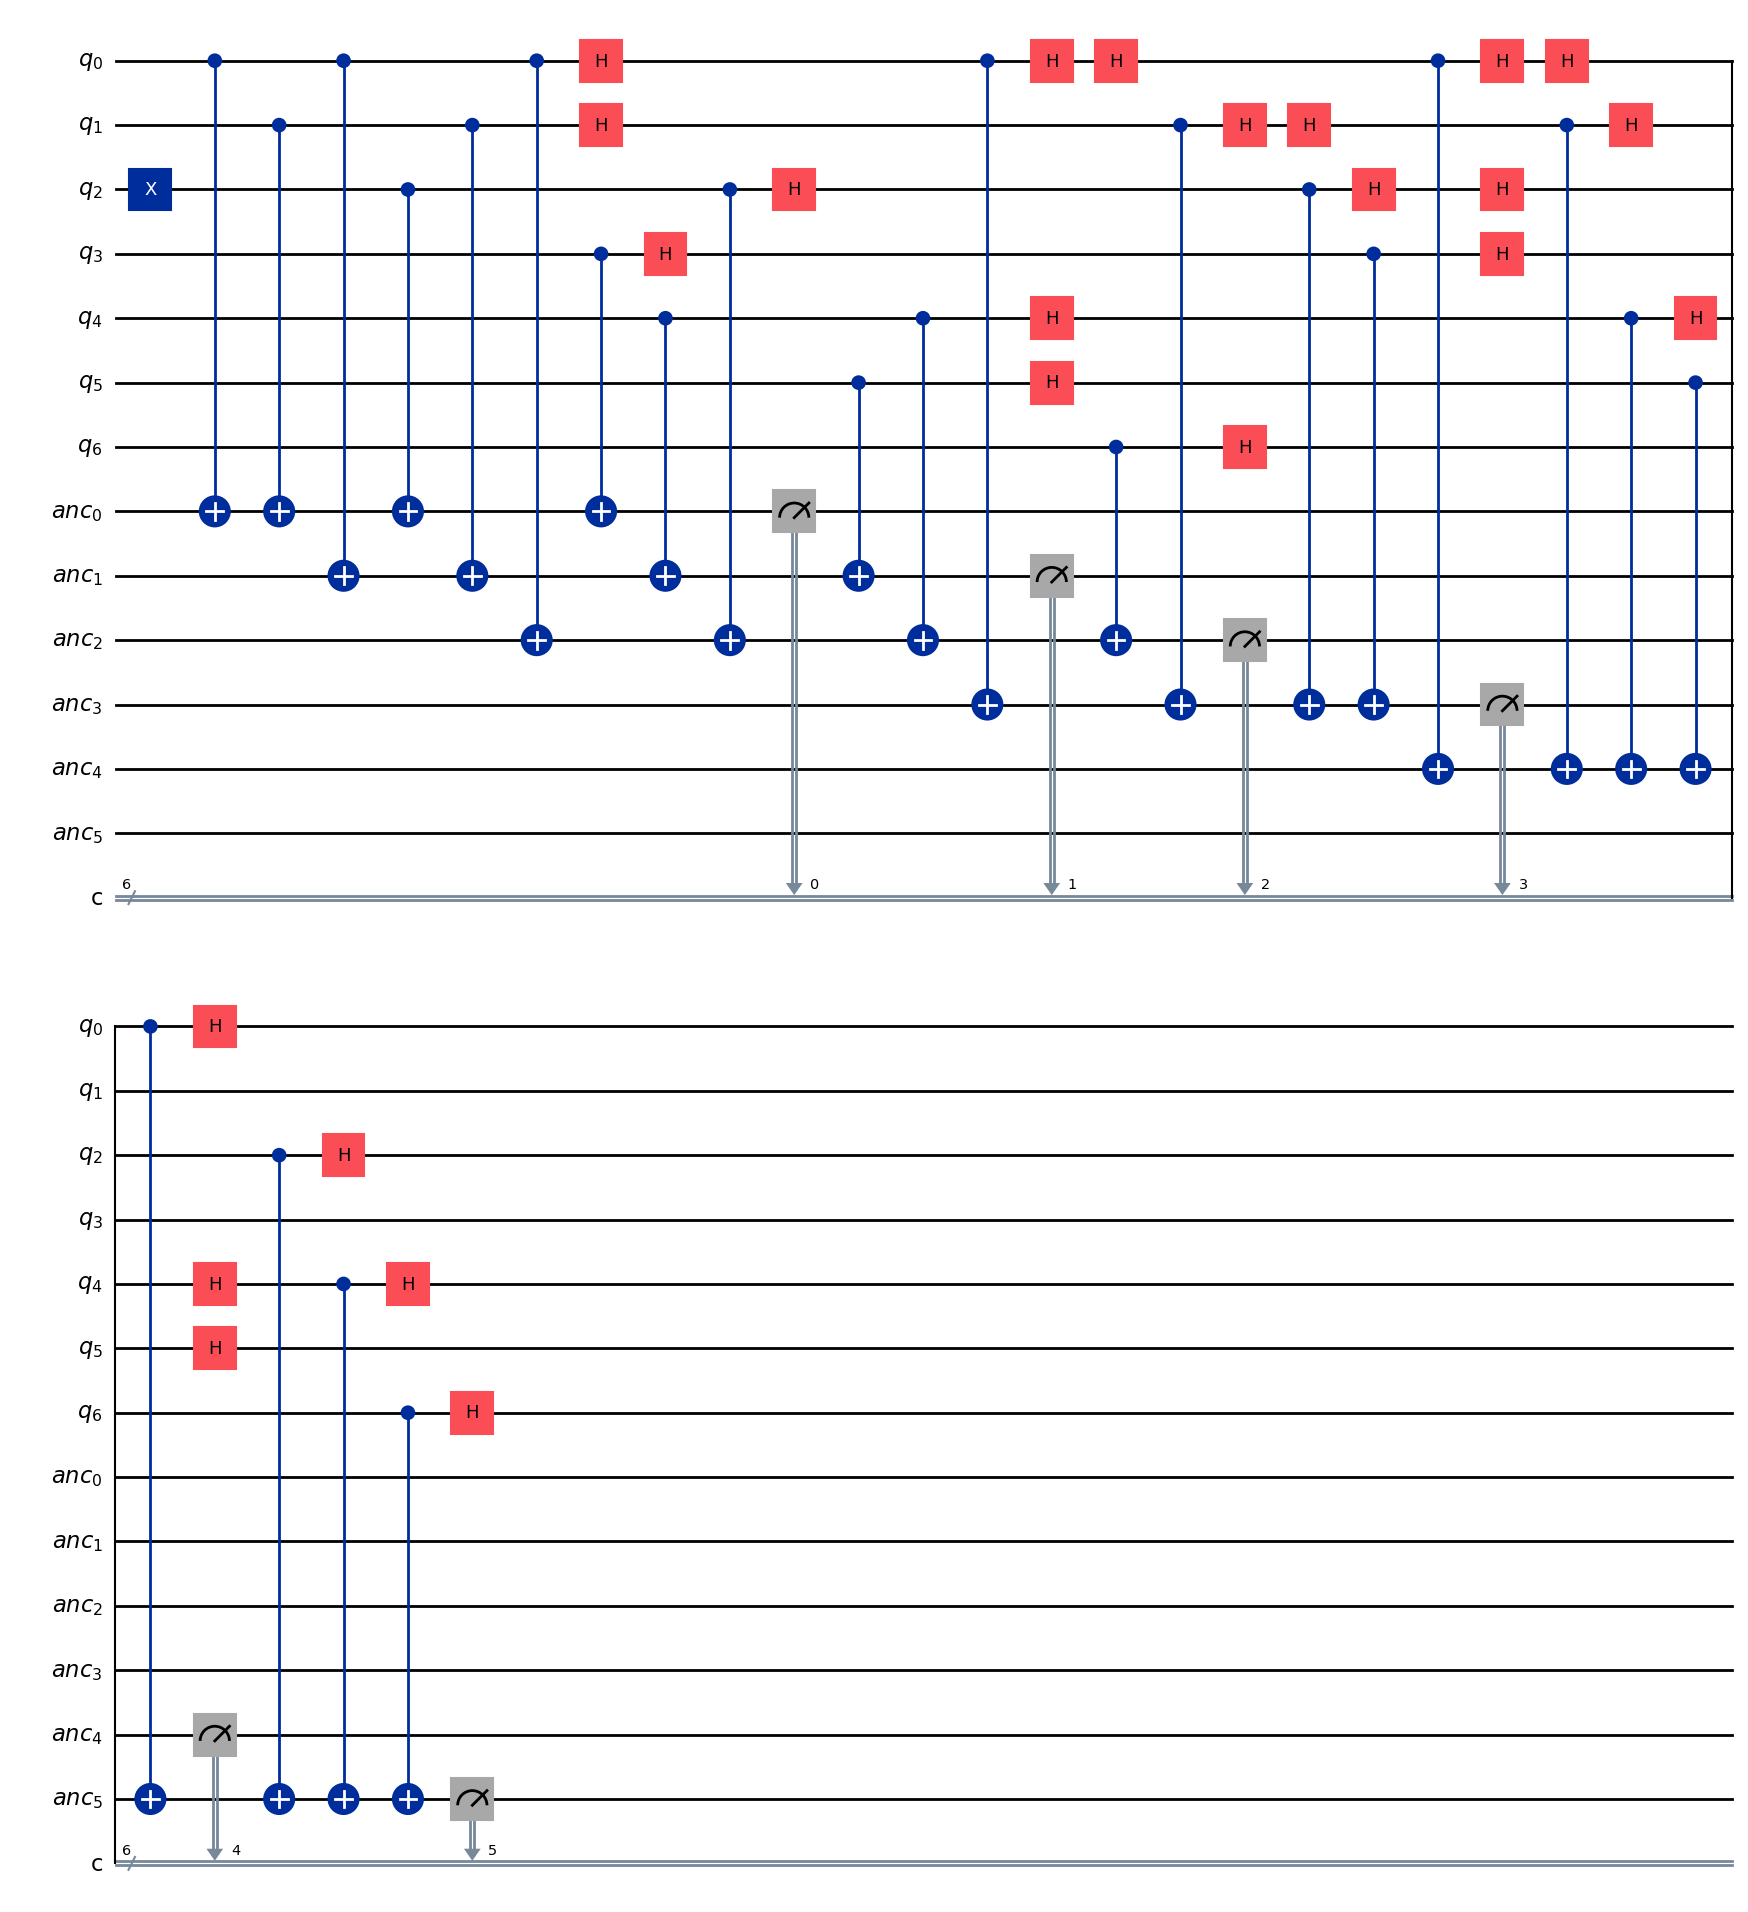

In [7]:
code = SteaneQuantumCode()
qc = code.build_syndrome_measure_circuit(add_error=(2, "X"))  # 在 q2 上加一个 X 错误试试
qc.draw("mpl")


In [8]:
backend = Aer.get_backend("aer_simulator")
tqc = transpile(qc, backend)
result = backend.run(tqc, shots=1024).result() #type: ignore
result.get_counts()


{'111101': 130,
 '001101': 151,
 '010101': 115,
 '101101': 118,
 '011101': 130,
 '100101': 124,
 '000101': 125,
 '110101': 131}